In [93]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np

all_params = pd.read_csv("./all_params.csv", index_col="idx")
all_params.index.names = ["tree_idx"]
mle_estimates = pd.read_csv("./mle_results/all_mle_results.csv", index_col="tree_idx").assign(model="MLE")
deep_estimates = pd.read_csv("./parameter_estimates/all_phylodeep_results.csv", index_col="tree_idx").assign(model="Phylodeep")

all_params.head()


,R,R_I,d,d_I,la_II,p_I,psi_I,t_I,R.1,d.1,tips,hidden_trees,end_time,R_observed,d_observed,zeta_observed
tree_idx,,,,,,,,,,,,,,,,
5633,1.320240,1.320240,1.96464,1.96464,0.672,0.5,0.509,1.96464,1.320240,1.96464,151,1,25.9030,1.34118,1.89688,0.331140
3242,1.130980,1.130980,2.51889,2.51889,0.449,0.5,0.397,2.51889,1.130980,2.51889,170,3,29.5353,1.15361,2.44580,0.461957
7024,0.552209,0.552209,2.00803,2.00803,0.275,0.5,0.498,2.00803,0.552209,2.00803,10,2,19.7618,1.07143,3.12717,0.666667
8317,1.959130,1.959130,2.40385,2.40385,0.815,0.5,0.416,2.40385,1.959130,2.40385,125,0,15.0599,1.85106,2.36896,0.287356
1455,1.318780,1.318780,4.36681,4.36681,0.302,0.5,0.229,4.36681,1.318780,4.36681,238,0,57.7343,1.27293,3.98281,0.418278


In [94]:
mle_estimates.head()

,tip_size,true_lambda,true_mu,lambda,mu,R0,infectious_period,log_likelihood,n_iterations,model
tree_idx,,,,,,,,,,
5470,50,NaN,NaN,0.701455,0.352806,1.988219,2.834419,-129.589859,1,MLE
7460,50,NaN,NaN,0.671398,0.402639,1.667493,2.483614,-136.476090,1,MLE
4555,50,NaN,NaN,0.379407,0.010000,37.940674,100.000000,-154.466965,1,MLE
6092,50,NaN,NaN,0.513217,0.010000,51.321743,100.000000,-128.066657,1,MLE
8534,50,NaN,NaN,0.557417,0.350288,1.591312,2.854796,-146.999226,1,MLE


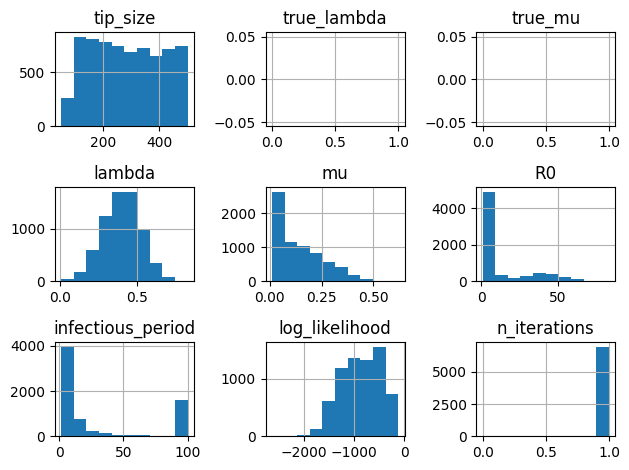

In [95]:
mle_estimates.hist()
plt.tight_layout()

In [96]:
deep_estimates.head()

,tip_size,true_lambda,true_mu,R0,infectious_period,mu,lambda,success,model
tree_idx,,,,,,,,,
5470,50,NaN,NaN,1.457854,1.336562,0.748188,1.090749,True,Phylodeep
7460,50,NaN,NaN,1.140366,1.177454,0.849290,0.968501,True,Phylodeep
4555,50,NaN,NaN,4.788179,7.078835,0.141266,0.676408,True,Phylodeep
6092,50,NaN,NaN,3.899858,4.219173,0.237013,0.924318,True,Phylodeep
8534,50,NaN,NaN,1.086004,1.395284,0.716700,0.778339,True,Phylodeep


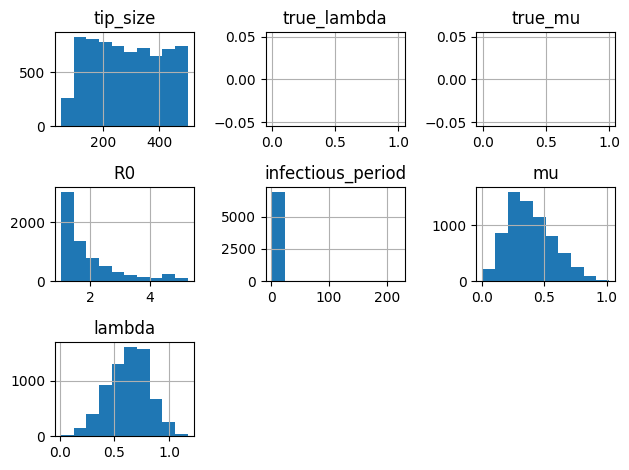

In [97]:
deep_estimates.hist()
plt.tight_layout()

In [ ]:
true_params = all_params[["tree_idx", "R", "la_II", "psi_I", "tips"]].rename(columns={"R": "R_naught", "la_II": "lambda_true", "psi_I": "mu_true"})

model_comparison_mle = pd.merge(
    true_params,
    mle_estimates[["lambda", "mu"]],
    left_index=True, right_index=True, how="outer"
).reset_index().assign(model="MLE")

model_comparison_deep = pd.merge(
    true_params,
    deep_estimates[["lambda", "mu"]],
    left_index=True, right_index=True, how="outer"
).reset_index().assign(model="Phylodeep")

long_data = pd.concat([model_comparison_mle, model_comparison_deep], axis=0)

lambda_compare = long_data[["lambda_true", "lambda", "model", "tips"]].rename(columns={"lambda_true": "true_value", "lambda": "estimate"}).assign(parameter="lambda")
mu_compare = long_data[["mu_true", "mu", "model", "tips"]].rename(columns={"mu_true": "true_value", "mu": "estimate"}).assign(parameter="mu")

long_data = pd.concat([lambda_compare, mu_compare], axis=0)
long_data.head()



,true_value,estimate,model,tips,parameter
0,0.402,0.256912,MLE,285,lambda
1,0.727,0.393022,MLE,320,lambda
2,0.785,0.444973,MLE,187,lambda
3,0.749,0.410200,MLE,491,lambda
4,0.727,0.477023,MLE,286,lambda


In [124]:
long_data["err"] = long_data["true_value"] - long_data["estimate"]
long_data.head()

,true_value,estimate,model,tips,parameter,err
0,0.402,0.256912,MLE,285,lambda,0.145088
1,0.727,0.393022,MLE,320,lambda,0.333978
2,0.785,0.444973,MLE,187,lambda,0.340027
3,0.749,0.410200,MLE,491,lambda,0.338800
4,0.727,0.477023,MLE,286,lambda,0.249977


In [125]:
def rmse(x):
    return np.sqrt(np.mean(x**2))

def boot_rmse(x, n_boot=250):
    boot_samples = np.random.choice(x, size=(n_boot, len(x)), replace=True)
    boot_rmses = np.sqrt(np.mean(boot_samples**2, axis=1))
    return boot_rmses

def boot_rmse_mean(*args, **kwargs):
    return np.mean(boot_rmse(*args, **kwargs))

def boot_rmse_std(*args, **kwargs):
    return np.std(boot_rmse(*args, **kwargs))

# long_data.groupby("model")["err"].apply(boot_rmse)

long_data.dropna().groupby(["model", "parameter"])["err"].apply(boot_rmse_mean)

model      parameter
MLE        lambda       0.235778
           mu           0.268306
Phylodeep  lambda       0.042030
           mu           0.034827
Name: err, dtype: float64

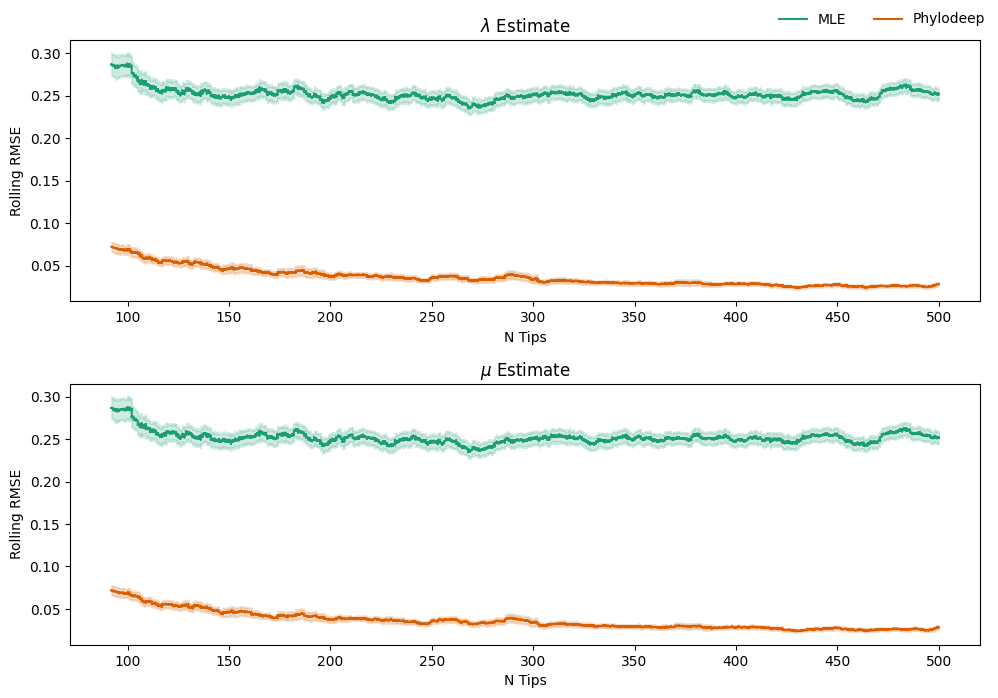

In [199]:
cmap = matplotlib.colormaps["Dark2"]

fig, ax = plt.subplots(figsize=(10, 7), nrows=2)
for j, (param, sub_df) in enumerate(long_data.groupby("parameter")):
    for i, (model_name, group_df) in enumerate(long_data.groupby("model")):
        sort_df = group_df.sort_values("tips", ascending=True, inplace=False)
        roll_rmse = sort_df.rolling(window=500)["err"].apply(boot_rmse_mean)
        roll_std = sort_df.rolling(window=500)["err"].apply(boot_rmse_std)
        
        roll_ci_se = 1.96 * roll_std 
        low, high = roll_rmse - roll_ci_se, roll_rmse + roll_ci_se

        rmse_ests = sort_df.rolling(window=500)["err"].apply(boot_rmse_mean)
        ax[j].fill_between(sort_df["tips"], low, high, alpha=0.2, color=cmap(i))
        ax[j].plot(sort_df["tips"], roll_rmse, label=model_name, color=cmap(i))
    param_name = "$\\lambda$" if param == "lambda" else "$\\mu$"

    ax[j].set_ylabel("Rolling RMSE")
    ax[j].set_xlabel("N Tips")
    ax[j].set_title(f"{param_name} Estimate")
    
# --- Extract handles & labels from *one* axis ---
handles, labels = ax[0].get_legend_handles_labels()

# --- Make a single shared legend ---
fig.legend(
    handles, labels,
    loc="upper right",
    ncol=len(labels),
    frameon=False
)
plt.tight_layout()  # leave space for legend
plt.savefig("docs/presentation/images/RMSE_vs_tips.png")


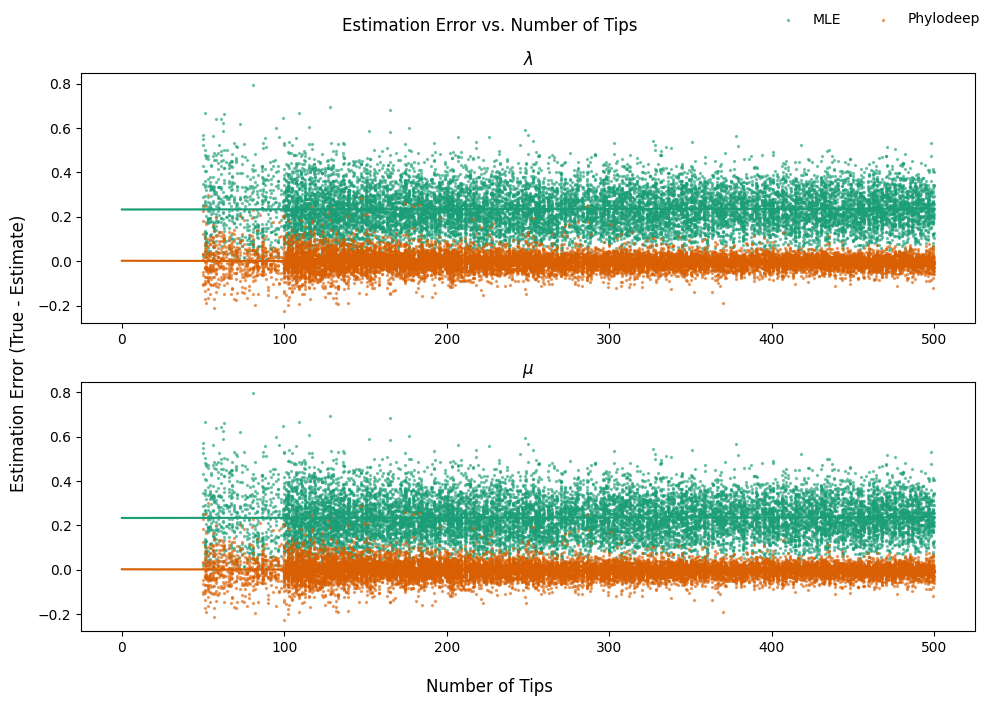

In [202]:
fig, ax = plt.subplots(figsize=(10, 7), nrows=2)

for j, (param, sub_df) in enumerate(long_data.groupby("parameter")):

    for i, (type, group) in enumerate(long_data.groupby("model")):

        # filled_df = group.dropna(subset=["err"]).sort_values("tips")
        filled_df = group.dropna(subset=["err"])
        # filled_df = filled_df[filled_df["err"] > 0]

        # --- Fit and covariance from polyfit ---
        (b, a), cov = np.polyfit(filled_df["tips"], filled_df["err"], 1, cov=True)
        
        # Create x-range for smooth line
        x_vals = np.linspace(0, 500, 200)
        y_hat = a + b * x_vals

        # --- Compute standard error band ---
        # cov = [[var(b), cov(b,a)], [cov(a,b), var(a)]]
        # For y = a + b*x: var(y) = var(a) + x^2 var(b) + 2x cov(a,b)
        var_b, cov_ba, var_a = cov[0,0], cov[0,1], cov[1,1]
        se_y = np.sqrt(var_a + (x_vals**2) * var_b + 2 * x_vals * cov_ba)

        # 1 SE band (use 1.96 * se_y for 95% CI)
        ax[j].fill_between(
            x_vals,
            y_hat - 1.96*se_y,
            y_hat + 1.96*se_y,
            color=cmap(i),
            alpha=0.25,
            linewidth=0
        )

        # Plot data & fit
        ax[j].scatter(
            group["tips"],
            group["err"],
            label=type,
            alpha=0.50,
            s=2,
            color=cmap(i)
        )
        ax[j].plot(x_vals, y_hat, color=cmap(i))

    # Title per panel
    param_name = "$\\lambda$" if param == "lambda" else "$\\mu$"
    ax[j].set_title(f"{param_name}")

handles, labels = ax[0].get_legend_handles_labels()

# --- Make a single shared legend ---
fig.legend(
    handles, labels,
    loc="upper right",
    ncol=len(labels),
    frameon=False,
)
fig.suptitle("Estimation Error vs. Number of Tips")
fig.supxlabel("Number of Tips")
fig.supylabel("Estimation Error (True - Estimate)")

fig.tight_layout()
fig.savefig("./docs/presentation/images/estimation_error_vs_tips.png", dpi=300)

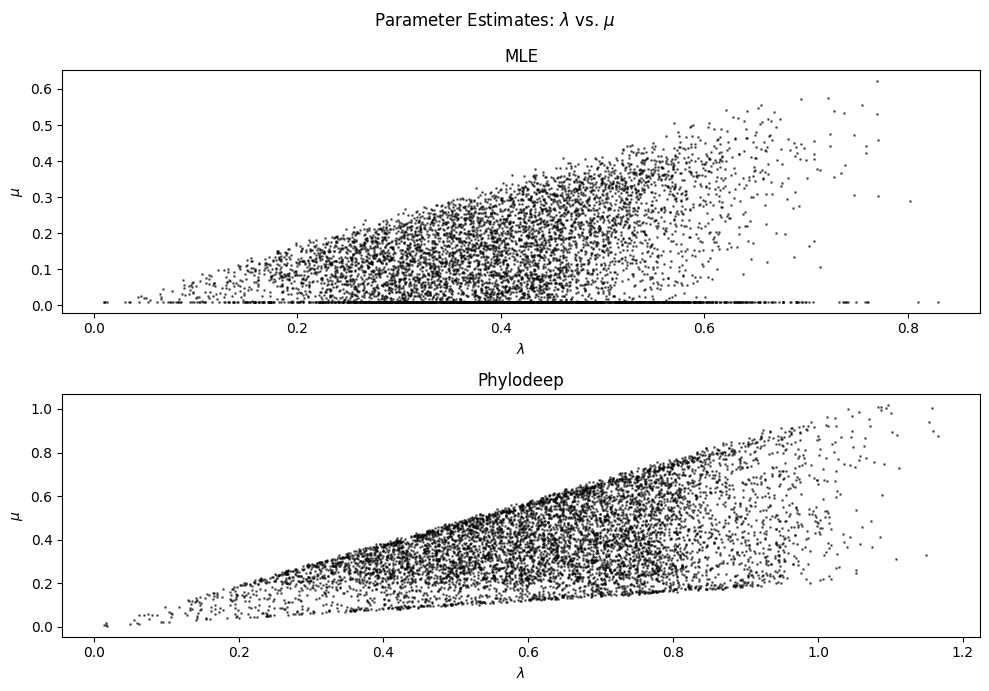

In [196]:
fig, ax = plt.subplots(figsize=(10, 7), nrows=2)

for j, (param, sub_df) in enumerate(long_data.groupby("model")):
    x_vals = sub_df[sub_df["parameter"] == "lambda"]
    y_vals = sub_df[sub_df["parameter"] == "mu"]
    ax[j].scatter(x_vals["estimate"], y_vals["estimate"], alpha=0.5, s=1, color="black")
    ax[j].set_title(param)
    ax[j].set_xlabel("$\\lambda$")
    ax[j].set_ylabel("$\\mu$")
fig.suptitle("Parameter Estimates: $\\lambda$ vs. $\\mu$")
fig.tight_layout()
fig.savefig("./docs/presentation/images/lambda_vs_mu_estimates.png")

,tree_idx,true_value,estimate,model,tips,parameter,err
0,0,0.402,0.256912,MLE,285,lambda,0.145088
1,1,0.727,0.393022,MLE,320,lambda,0.333978
2,2,0.785,0.444973,MLE,187,lambda,0.340027
3,3,0.749,0.410200,MLE,491,lambda,0.338800
4,4,0.727,0.477023,MLE,286,lambda,0.249977
...,...,...,...,...,...,...,...
34615,8650,0.823,NaN,Phylodeep,11,mu,NaN
34616,8651,0.822,NaN,Phylodeep,12,mu,NaN
34617,8652,0.005,0.004555,Phylodeep,113,mu,0.000445
34618,8653,0.855,NaN,Phylodeep,36,mu,NaN
